<a href="https://colab.research.google.com/github/adrita23/Predicting-Hirability-from-Job-Interview/blob/main/Predicting_One's_Hirability_Based_on_the_Job_Interview_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Date: Nov 20, 2021
#Author: Adrita Anika

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML HW/data.csv')

In [4]:
data

,PID,SCL,SCRamp,SCRfreq,HRmean,ACCmean,Energy,ZCR,VoiceProb,Hirability
0,P1,0.827077,0.094424,2.898792,73.276206,66.491987,0.005447,0.120261,0.403078,4
1,P2,5.183890,0.244549,5.219806,102.502828,65.031908,0.005782,0.074726,0.457309,5
2,P3,0.023257,0.000000,0.000000,90.603827,64.658708,0.006265,0.098657,0.427495,5
3,P4,0.211715,0.008790,2.299042,80.258785,65.260810,0.006127,0.091186,0.437544,3
4,P5,0.082192,0.011505,1.299459,71.348170,66.607203,0.005081,0.076909,0.374498,4
5,P6,0.517391,0.029026,3.098709,67.658486,64.071636,0.004374,0.076218,0.423185,4
6,P7,4.811771,0.149931,6.972349,95.436294,65.195180,0.004903,0.052587,0.423719,5
7,P8,0.196216,0.035307,0.799667,52.604792,65.468119,0.003720,0.074693,0.456545,4
8,P9,0.342106,0.010594,1.099542,83.181398,63.967582,0.005858,0.114835,0.424477,4
9,P10,0.408798,0.042047,1.999167,62.833577,65.411525,0.006067,0.095510,0.548340,5


In [5]:
data_n = data.to_numpy()

In [6]:
#Feature Exploration
from scipy import stats
for i in range(1, 9):
  #print(len(data.columns[i]), len(data.columns[-1]))
  pearson_r, p = stats.pearsonr(data[data.columns[i]], data[data.columns[-1]])
  print(f"The Pearson coefficient between {data.columns[-1]} and {data.columns[i]} are: {round(pearson_r,4)}")


The Pearson coefficient between Hirability and SCL are: -0.0502
The Pearson coefficient between Hirability and SCRamp are: 0.1669
The Pearson coefficient between Hirability and SCRfreq are: -0.2801
The Pearson coefficient between Hirability and HRmean are: 0.0894
The Pearson coefficient between Hirability and ACCmean are: 0.0295
The Pearson coefficient between Hirability and Energy are: 0.4768
The Pearson coefficient between Hirability and ZCR are: -0.0493
The Pearson coefficient between Hirability and VoiceProb are: 0.2872


**a.** The Correlation Co-efficient is calculated between hirability and each of the eight features. SCL, SCRfreq, ZCR are negatively co-related. SCRamp, HRmean, ACCmean, Energy and VoiceProb are positively co-related with the outcome of interest. The highest co-relation is found with Energy.

In [ ]:
#Decision tree: 
#All features: cross validation (LOSO) for tree depth selection

#model
import sklearn
from sklearn import tree
#clf = clf.fit(X, y)
#clf.predict([[1, 1]])

#cross validation
from sklearn.model_selection import cross_val_score
tree_depth = [2,3,4,5,6,7,8,9, 10, 11, 12]
cv_error = np.zeros(len(tree_depth))

k = 0
for d in tree_depth:
  fold_error = np.zeros(data_n.shape[0])
  for i in range(data_n.shape[0]):
    valid_data = data_n[i, 1:-1]
    print("valid", valid_data)
    valid_data_label = data_n[i, -1]
    train_data = np.delete(data_n, i, axis = 0)
    clf = tree.DecisionTreeClassifier()
    clf = tree.DecisionTreeClassifier(max_depth = d)
    clf.fit(train_data[:, 1:-1], train_data[:,-1].astype('int'))
    #print("valid data",valid_data[-1])
    predictX = clf.predict(valid_data.reshape(1, 8))
    error = np.abs(predictX - valid_data_label)
    #print("error", error)
    fold_error[i] = np.sum(error)
  cv_error[k] = np.average(fold_error)
  k+=1

'''
for d in range(len(tree_depth)):
  clf = tree.DecisionTreeClassifier(max_depth = tree_depth[d])
  cv_errorr = cross_val_score(clf, data_n[:,1:-1], data_n[:,-1].astype('int'), cv = 2)
  #clf.fit(data_n[:,1:-1], data_n[:,-1].astype('int'))
  print(cv_error)
'''

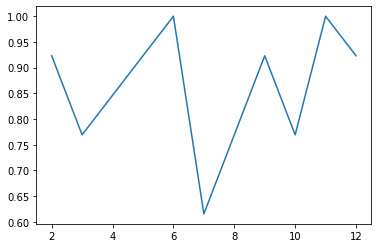

In [8]:
import matplotlib.pyplot as plt
plt.plot(tree_depth, cv_error)

In [9]:
print(f"The minimum error for a decision tree with all features is found at a tree depth of {tree_depth[np.argmin(cv_error)]}. ")

The minimum error for a decision tree with all features is found at a tree depth of 7. 


In [ ]:
#feature combinations: 1-SCL, 2-SCRamp, 3-SCRfreq, 4-HRmean, 5:ACCmean, 6:Energy, 7:ZCR, 8:VoiceProb  
#feature_combination1: SCRamp, HRmean, ACCmean, Energy, VoiceProb
FeatureData1 = np.vstack((data_n[:,2], data_n[:,4], data_n[:,5], data_n[:,6], data_n[:,8], data_n[:,9])).T
cv_error = np.zeros(len(tree_depth))
k = 0
for d in tree_depth:
  fold_error = np.zeros(data_n.shape[0])
  for i in range(data_n.shape[0]):
    valid_data = FeatureData1[i, 0:-1]
    print("valid", valid_data)
    valid_data_label = FeatureData1[i, -1]
    train_data = np.delete(FeatureData1, i, axis = 0)
    clf1 = tree.DecisionTreeClassifier(max_depth = d)
    clf1.fit(train_data[:, 0:-1], train_data[:,-1].astype('int'))
    #print("valid data",valid_data[-1])
    predictX = clf1.predict(valid_data.reshape(1, 5))
    error = np.abs(predictX - valid_data_label)
    #print("error", error)
    fold_error[i] = np.sum(error)
  cv_error[k] = np.average(fold_error)
  k+=1

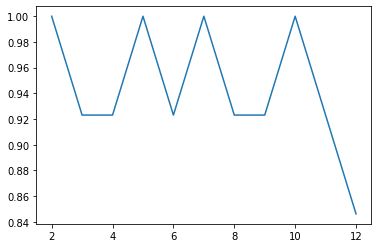

In [11]:
import matplotlib.pyplot as plt
plt.plot(tree_depth, cv_error)

In [12]:
print(f"The minimum error for a decision tree with features: SCRamp, HRmean, ACCmean, Energy, VoiceProb (features that are positively co-related with the outcome of interest) is found at a tree depth of {tree_depth[np.argmin(cv_error)]}. ")

The minimum error for a decision tree with features: SCRamp, HRmean, ACCmean, Energy, VoiceProb (features that are positively co-related with the outcome of interest) is found at a tree depth of 12. 


In [ ]:
#feature_combination2: Energy, VoiceProb,  SCRamp
FeatureData2 = np.vstack((data_n[:,6], data_n[:,2],data_n[:,8], data_n[:,9])).T
cv_error = np.zeros(len(tree_depth))

k = 0
for d in tree_depth:
  fold_error = np.zeros(data_n.shape[0])
  for i in range(data_n.shape[0]):
    valid_data = FeatureData2[i, 0:-1]
    print("valid", valid_data)
    valid_data_label = FeatureData2[i, -1]
    train_data = np.delete(FeatureData2, i, axis = 0)
    clf2 = tree.DecisionTreeClassifier(max_depth = d)
    clf2.fit(train_data[:, 0:-1], train_data[:,-1].astype('int'))
    #print("valid data",valid_data[-1])
    predictX = clf2.predict(valid_data.reshape(1, 3))
    error = np.abs(predictX - valid_data_label)
    #print("error", error)
    fold_error[i] = np.sum(error)
  cv_error[k] = np.average(fold_error)
  k+=1

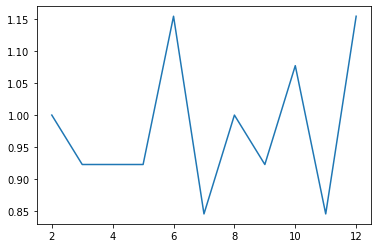

In [14]:
import matplotlib.pyplot as plt
plt.plot(tree_depth, cv_error)

In [15]:
print(f"The minimum error for a decision tree with features:Energy, VoiceProb, SCRamp  is found at a tree depth of {tree_depth[np.argmin(cv_error)]}. ")

The minimum error for a decision tree with features:Energy, VoiceProb, SCRamp  is found at a tree depth of 7. 


In [ ]:
#feaute_combination3: Energy, SCL, SCRfreq, ZCR
FeatureData3 = np.vstack((data_n[:,6], data_n[:,1],data_n[:,2],data_n[:,7], data_n[:,9])).T
cv_error = np.zeros(len(tree_depth))

k = 0
for d in tree_depth:
  fold_error = np.zeros(data_n.shape[0])
  for i in range(data_n.shape[0]):
    valid_data = FeatureData3[i, 0:-1]
    print("valid", valid_data)
    valid_data_label = FeatureData3[i, -1]
    train_data = np.delete(FeatureData3, i, axis = 0)
    clf3 = tree.DecisionTreeClassifier(max_depth = d)
    clf3.fit(train_data[:, 0:-1], train_data[:,-1].astype('int'))
    #print("valid data",valid_data[-1])
    predictX = clf3.predict(valid_data.reshape(1, 4))
    error = np.abs(predictX - valid_data_label)
    #print("error", error)
    fold_error[i] = np.sum(error)
  cv_error[k] = np.average(fold_error)
  k+=1

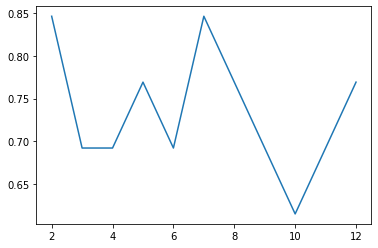

In [32]:
import matplotlib.pyplot as plt
plt.plot(tree_depth, cv_error)

In [33]:
print(f"The minimum error for a decision tree with features:Energy, SCL, SCRfreq, ZCR is found at a tree depth of {tree_depth[np.argmin(cv_error)]}. ")

The minimum error for a decision tree with features:Energy, SCL, SCRfreq, ZCR is found at a tree depth of 10. 


**b.** I have experimented with various depth of decision trees and different features with leave one sample out cross-va;idation. Following is the result.

1. All Features: The minimum absolute error is found at tree depth of 7.

2. Features that are positively co-related- SCRamp, HRmean, ACCmean, Energy, VoiceProb: The minimum error is found at a tree depth of 12.

3. Feature Set- Energy, VoiceProb, SCRamp: The minimum error is found at a tree depth of 7. 

4. Feature Set- Energy, SCL, SCRfreq, ZCR: The minimum error is found at a tree depth of 10. 

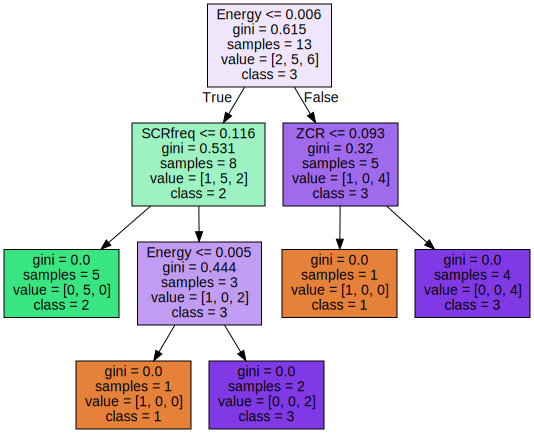

In [52]:
features = np.array(data.columns[1:-1])
feature_set3 = ['Energy', 'SCL', 'SCRfreq', 'ZCR']
feature_set2 = ["Energy", "VoiceProb", "SCRamp"]
clf3 = tree.DecisionTreeClassifier(max_depth = 10)
clf3.fit(FeatureData3[:, 0:-1], FeatureData3[:,-1].astype('int'))
#print(features)
targets = ['1','2','3','4','5']
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf3, out_file=None, 
                                feature_names=feature_set3,  
                                class_names=targets,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

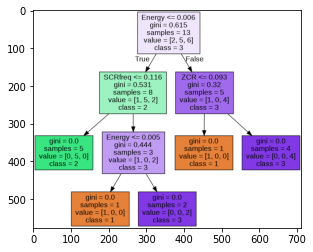

In [71]:
graph.render("decision_tree_graphivz")
import matplotlib.image as img
# reading png image file
im = img.imread('decision_tree_graphivz.png')
  
# show image
plt.imshow(im)

In [ ]:
#tree.plot_tree(clf3)

**c.** The best decision tree is found for these features 'Energy', 'SCL', 'SCRfreq', 'ZCR'. The tree has been plotted above. Though there are five target classes, our training set has samples from three classses. That is why thee decision tree considers three classes: class 1 means hireability 3, class 2 means hireability 4, class 3 means hireability 5.

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
num_trees_forest= [3,4,5,6,7,8,9,10,15,20]
forest_depth = [3,4,5,6,7,8,9,10,11,12] 
from itertools import product

pairs = list(product(num_trees_forest, forest_depth))
cv_error_rf = np.zeros(len(pairs))
k= 0
for pair in pairs:
  fold_error = np.zeros(data_n.shape[0])

  for i in range(data_n.shape[0]):
    valid_data = data_n[i, 1:-1]
    print("valid", valid_data)
    valid_data_label = data_n[i, -1]
    train_data = np.delete(data_n, i, axis = 0)
    # creating a RF classifier
    clf = RandomForestClassifier(n_estimators = pair[0], max_depth = pair[1]) 
  
    # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    clf.fit(train_data[:, 1:-1], train_data[:,-1].astype('int'))
    #print("valid data",valid_data[-1])
    predictX = clf.predict(valid_data.reshape(1, 8))
    error = np.abs(predictX - valid_data_label)
    #print("error", error)
    fold_error[i] = np.sum(error)
  cv_error_rf[k] = np.average(fold_error)
  k+=1

0.38461538461538464
num_of_trees =  3 , tree_depth_of_the_forest 3


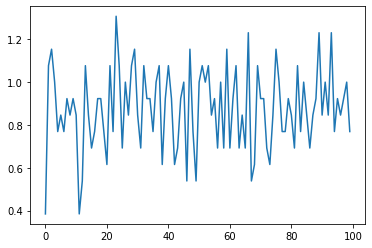

In [54]:
plt.plot(cv_error_rf)
print(np.min(cv_error_rf))
print("num_of_trees = ", pairs[np.argmin(cv_error_rf)][0],", tree_depth_of_the_forest", pairs[np.argmin(cv_error_rf)][1])

**d.** I have experimented with various number of trees (3,4,5,6,7,8,9,10,15,20) and different maximum depth (3,4,5,6,7,8,9,10,11,12). The minimum error was found with 3 trees and tree depth of 3. Random forest performs better than decision trees as the minimum error for random forest is 0.38, whereas decision tree has 0.6 as the minimum error.


In [65]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.models import DecisionTreeClassifier
num_estimators_adaboost = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25]
cv_error_abc = np.zeros(len(num_estimators_adaboost))
k = 0
for n in num_estimators_adaboost:
  fold_error = np.zeros(data_n.shape[0])

  for i in range(data_n.shape[0]):
    valid_data = data_n[i, 1:-1]
    #print("valid", valid_data)
    valid_data_label = data_n[i, -1]
    train_data = np.delete(data_n, i, axis = 0)
    # Create adaboost classifer object
    abc = AdaBoostClassifier(n_estimators= n)
    # Train Adaboost Classifer
    model = abc.fit(train_data[:, 1:-1], train_data[:,-1].astype('int'))

    #Predict the response for test dataset
    predictX = model.predict(valid_data.reshape(1, 8))
    error = np.abs(predictX - valid_data_label)
    #print("error", error)
    fold_error[i] = np.sum(error)
  cv_error_abc[k] = np.average(fold_error)
  k+=1

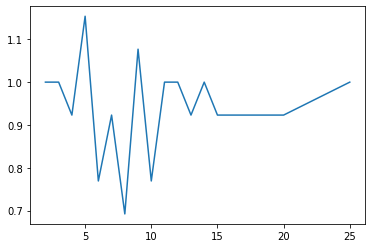

In [66]:
plt.plot(num_estimators_adaboost, cv_error_abc)

**e.** I have selected decision tree as the base model and experimented with various number of estimators for the AdaBoost Classifier. The minimum error was found for 10 estimators as shown above. Random Forest Classifiers performs better than Adaboost Classifiers. Decision Tree classifiers Performs slightly better than AdaBoost classifiers. 